In [3]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

EPOCHS = 8
IMG_WIDTH = 300
IMG_HEIGHT = 300
NUM_CATEGORIES = 3
TEST_SIZE = 0.25
MODEL_NAME = 'cnn-combined_updated.hd5'
data_dir = './coins_dataset_combined'

In [4]:
mapping_label = {'10c':0,
  '20c':1,
  '5c':2}

def load_data(dir):
    # initialise list of images
    images = []
    # initialise list of labels
    labels = []
    for root, dirs, files in os.walk(dir):
        
        for name in files:
            path = os.path.join(root, name)
            img = Image.open(path)
            img=img.rotate(4)
            area = (400, 250, 950, 800)
            img = img.crop(area)
            
            pil_image = img.convert('RGB') 
            open_cv_image = np.array(pil_image) 
            # Convert RGB to BGR 
            resized_image = open_cv_image[:, :, ::-1].copy() 

            # To pass these images into a neural network, the images will need to be the same size
            resized_image = cv2.resize(resized_image, (IMG_WIDTH, IMG_HEIGHT))
            # add resized image to images list
            images.append(resized_image)
            # add category to labels array
            path=os.path.dirname(path)
            labels.append(mapping_label[os.path.basename(path)])

    return images,labels
images, labels = load_data(data_dir)
# print(images)
# print(labels)

In [7]:
from PIL import Image
# img = Image.open("./coins_dataset/10c-heads/20c-image40.jpg")
# img=img.rotate(4)
# area = (400, 250, 950, 800)
# cropped_img = img.crop(area)
# cropped_img.show()
img.show()

In [4]:
# Gets CNN model/ creates it if there is none.
def get_model(model_name):
    if os.path.exists(model_name):
        model = load_model(model_name)   
    
    else:
        """
        Returns a compiled convolutional neural network model. Assume that the
        `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
        The output layer should have `NUM_CATEGORIES` units, one for each category.
        """
        # vary different number of convolutional and pooling layers
        # different number and sizes of filters for convolutional layers
        # different pool sizes for pooling layers
        # different numbers and sizes of hidden layers
        # dropout
        model = Sequential()
        
        # Convolutional layer
        model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
    
        # Max-pooling layer, using 2x2 pool size
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

        model.add(MaxPooling2D(pool_size=(2,2)))

        # Flatten units
        model.add(Flatten())

        # Hidden layer with dropout layers
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.1))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.1))

        # output layer for output for all categories
        model.add(Dense(NUM_CATEGORIES, activation='softmax'))
    
    model.summary()
    return model


In [5]:
def train(model, x_train, y_train, epochs, x_test, y_test, model_name):
    model.compile(
            optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"]
        )

    savemodel = ModelCheckpoint(model_name)
    stopmodel = EarlyStopping(patience=4) 

    print("Starting training.")

    # Fit model on training data
    history = model.fit(x=x_train, y=y_train, batch_size=32,
                validation_data=(x_test, y_test), shuffle=False,
                epochs=epochs, 
                callbacks=[savemodel, stopmodel])
    
    # Evaluate neural network performance
    print("Done. Now evaluating.")
    loss, acc = model.evaluate(x=x_test, y=y_test)
    print("Test accuracy: %3.2f, loss: %3.2f"%(acc, loss))
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 64)                2

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 30s 4s/step - loss: 517.1006 - accuracy: 0.3319 - val_loss: 100.4562 - val_accuracy: 0.4935
Epoch 2/8
8/8 [==============================] - ETA: 0s - loss: 49.8707 - accuracy: 0.4061

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 49.8707 - accuracy: 0.4061 - val_loss: 2.5954 - val_accuracy: 0.5455
Epoch 3/8
8/8 [==============================] - ETA: 0s - loss: 1.9984 - accuracy: 0.6245

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 1.9984 - accuracy: 0.6245 - val_loss: 0.6888 - val_accuracy: 0.6623
Epoch 4/8
8/8 [==============================] - ETA: 0s - loss: 0.7332 - accuracy: 0.8035

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 0.7332 - accuracy: 0.8035 - val_loss: 0.7841 - val_accuracy: 0.6494
Epoch 5/8
8/8 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8996

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 0.3983 - accuracy: 0.8996 - val_loss: 0.6478 - val_accuracy: 0.7013
Epoch 6/8
8/8 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9170

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 27s 3s/step - loss: 0.1961 - accuracy: 0.9170 - val_loss: 0.2972 - val_accuracy: 0.8571
Epoch 7/8
8/8 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9738

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 0.1005 - accuracy: 0.9738 - val_loss: 0.6607 - val_accuracy: 0.8442
Epoch 8/8
8/8 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9694

INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


INFO:tensorflow:Assets written to: cnn-combined_updated.hd5\assets


8/8 [==============================] - 26s 3s/step - loss: 0.1256 - accuracy: 0.9694 - val_loss: 0.4739 - val_accuracy: 0.8831
Done. Now evaluating.
3/3 [==============================] - 2s 546ms/step - loss: 0.4739 - accuracy: 0.8831
Test accuracy: 0.88, loss: 0.47


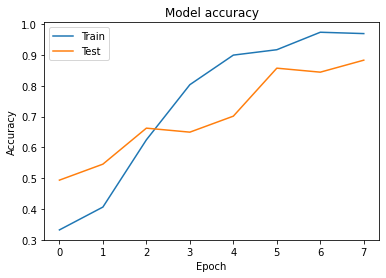

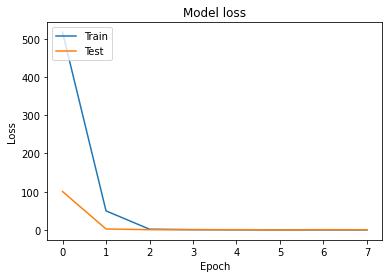

In [6]:
# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE, random_state=3237
)

model = get_model(MODEL_NAME)
train(model, x_train, y_train, EPOCHS, x_test, y_test, MODEL_NAME)